## Time Series - Tutorial

### References

- https://www.kaggle.com/blackecho/pandas-time-series-analysis
- https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
- https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
- https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
- https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000 -  Done
- https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3 - Done
- https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/ - Done



<b> Using LSTM Neural Network </b>
- https://github.com/jaungiers/LSTM-Neural-Network-for-Time-Series-Prediction

<b> Other Tutorials </b>
- https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

<b> Books </b>
-  Introduction to Time Series and Forecasting by Brockwell and Davis

#### Import libraries

In [293]:
import pandas as pd #pandas Dataframe
import numpy as np #Numpy library
from datetime import datetime #for date time functions

#http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller # for Stationarity Check

#https://matplotlib.org/users/customizing.html
import matplotlib.pyplot as plt #for plotiing
plt.rcParams["figure.figsize"] = (15, 6)

#Decompose trend and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

#To forcast TS
from statsmodels.tsa.arima_model import ARIMA

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

#Utilities
from Utilities.color import color

import statsmodels.api as sm

%matplotlib inline

In [142]:
#Set Fig Size
def reset_figsize():
    plt.rcParams["figure.figsize"] = (15, 6)

#### Read Data

In [64]:
data = pd.read_csv("../Datasets/AirPassengers.csv")
print(data.head(2))

print('\n Data Types')
print(data.dtypes)

#Read data as TS
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
# data = pd.read_csv('AirPassengers.csv', parse_dates='Month', index_col='Month',date_parser=dateparse)

     Month  #Passengers
0  1949-01          112
1  1949-02          118

 Data Types
Month          object
#Passengers     int64
dtype: object


#### Convert Month to Date time and set as index

In [65]:
con = data['Month']
data['Month'] = pd.to_datetime(data['Month'])
print(data.head(2))

data.set_index('Month', inplace=True)
print(data.head(2))

#check datatype of index
data.index

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

#### Convert to time series

In [66]:
#convert to time series:
ts = data['#Passengers']
ts.head(2)

Month
1949-01-01    112
1949-02-01    118
Name: #Passengers, dtype: int64

#### Explore Data

In [67]:
#1. Specific the index as a string constant:
ts['1949-01-01']

#2. Import the datetime library and use 'datetime' function:
ts[datetime(1949,1,1)]

112

In [68]:
#1. Specify the entire range:
ts['1949-01-01': '1949-04-01']

#2. Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [69]:
#all the values of the year 1949
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

### Check Stationarity of a Time Series

- Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:
<br> <br>
     - Cnstant mean
     - Constant variance
     - An autocovariance that does not depend on time.
        
        
- We can check stationarity using the following:
<br>
<br>
    - <b> Plotting Rolling Statistics: </b> We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
<br>  
<br>
    - <b> Dickey-Fuller Test: </b> This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

#### Plot Time series

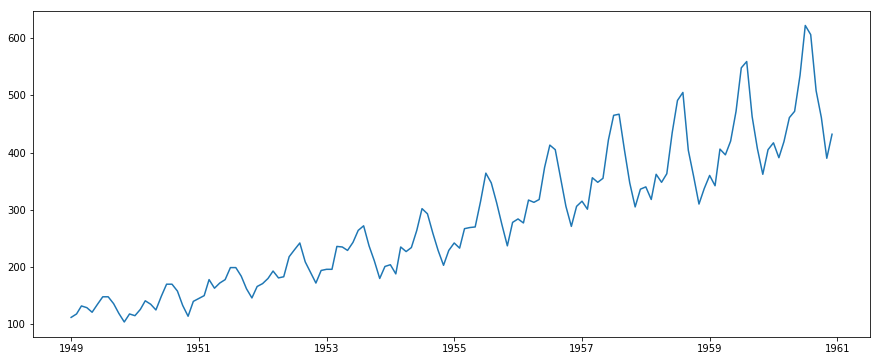

In [75]:
#plot

# # Get current size
# fig_size = plt.rcParams["figure.figsize"]
# fig_size

# f, axarr = plt.subplots()
# f.set_size_inches(15, 5)

plt.plot(ts)
plt.show()

- <b> statsmodels.tsa.stattools.adfuller </b>

    <b> Returns: </b> 	

    adf : float

        Test statistic

    pvalue : float

        MacKinnon’s approximate p-value based on MacKinnon (1994, 2010)

    usedlag : int

        Number of lags used

    nobs : int

        Number of observations used for the ADF regression and calculation of the critical values

    critical values : dict

        Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010)

    icbest : float

        The maximized information criterion if autolag is not None.

    resstore : ResultStore, optional

        A dummy class with results attached as attributes


In [99]:
def test_stationarity(timeseries):
    
    timeseries.dropna(inplace=True)
    
    #detrmine rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd =  timeseries.rolling(window=12,center=False).std()

    #plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')

    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #Perform Duckey-Fuller Test
    print(color.BOLD + 'Result of Duckey-Fuller Test' + color.END)
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index =['Test Statistic', 'p-value', '#Lag Used', 
                                             'Number of observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
        
    print(dfoutput)

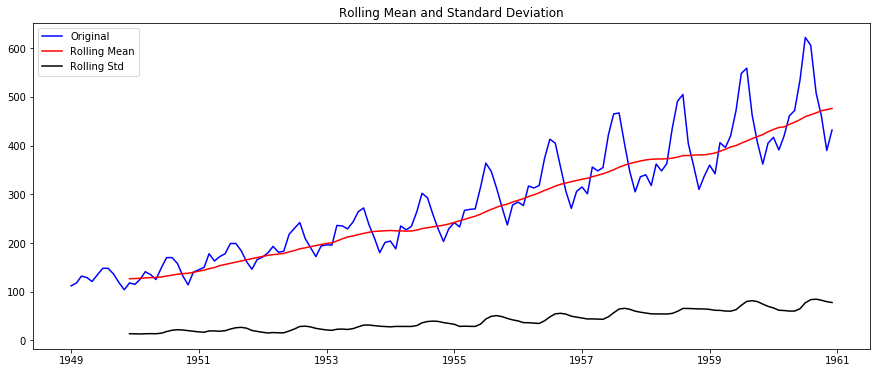

Result of Duckey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lag Used                       13.000000
Number of observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [72]:
# plot
# f, axarr = plt.subplots()
# f.set_size_inches(15, 5)

test_stationarity(ts)

Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values. Note that the signed values should be compared and not the absolute values.

#### How to make a Time Series Stationary?

Though stationarity assumption is taken in many TS models, almost none of practical time series are stationary. So statisticians have figured out ways to make series stationary. Actually, its almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

There are 2 major reasons behind non-stationaruty of a TS:
- <b> Trend </b>– varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
<br> <br>
- <b> Seasonality </b>– variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

#### Estimating & Eliminating Trend
- One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc.

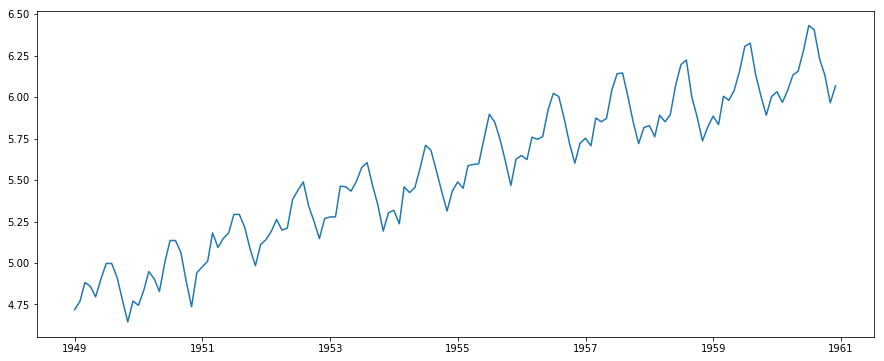

In [73]:
ts_log = np.log(ts)
plt.plot(ts_log)

In this simpler case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

    Aggregation – taking average for a time period like monthly/weekly averages
    Smoothing – taking rolling averages
    Polynomial Fitting – fit a regression model

<b> Moving average </b> <br>
In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

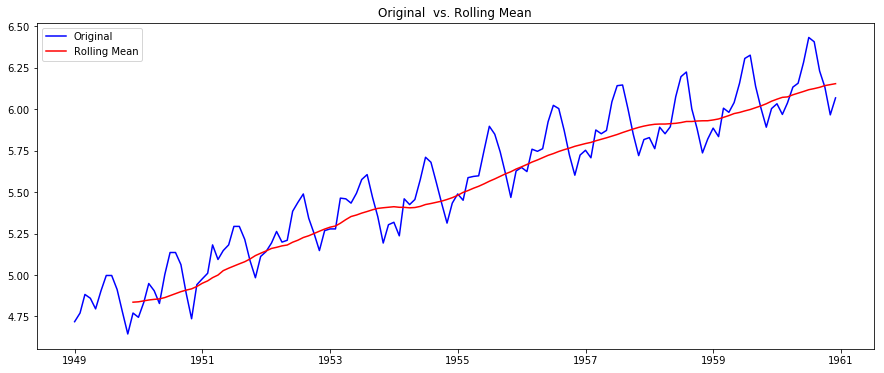

In [80]:
moving_avg =ts_log.rolling(window=12,center=False).mean()

#plot rolling statistics
orig = plt.plot(ts_log, color = 'blue', label = 'Original')
mean = plt.plot(moving_avg, color = 'red', label = 'Rolling Mean')

plt.legend(loc='best')
plt.title('Original  vs. Rolling Mean')
plt.show(block=False)

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values.

In [82]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

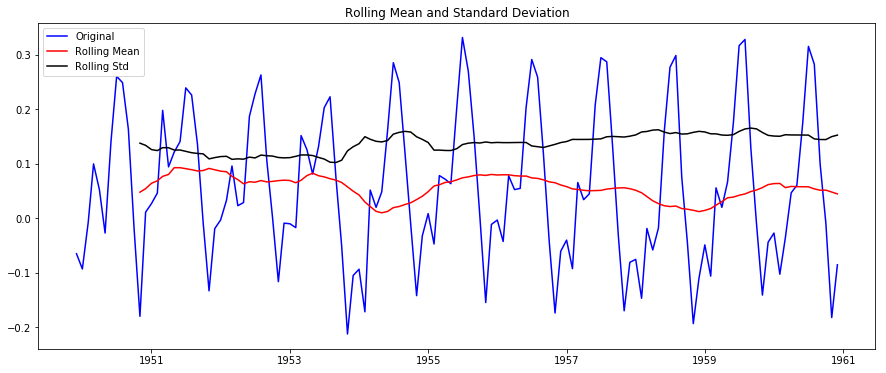

Result of Duckey-Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lag Used                       13.000000
Number of observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [87]:
#Lets drop these NaN values 
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with <b> 95% confidence </b> that this is a stationary series.

A drawback in this particular approach is that the time-period has to be strictly defined.

<b> Exponentially weighted moving average </b>
- Where weights are assigned to all the previous values with a decay factor

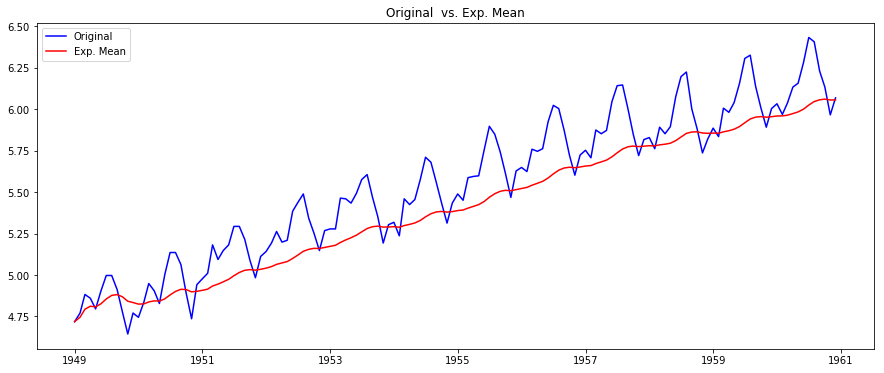

In [90]:
expweighted_avg = ts_log.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()

#plot rolling statistics
orig = plt.plot(ts_log, color = 'blue', label = 'Original')
mean = plt.plot(expweighted_avg, color = 'red', label = 'Exp. Mean')

plt.legend(loc='best')
plt.title('Original  vs. Exp. Mean')
plt.show(block=False)

The parameter ‘halflife’ is used to define the amount of exponential decay. <br>
Source - http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-moment-functions

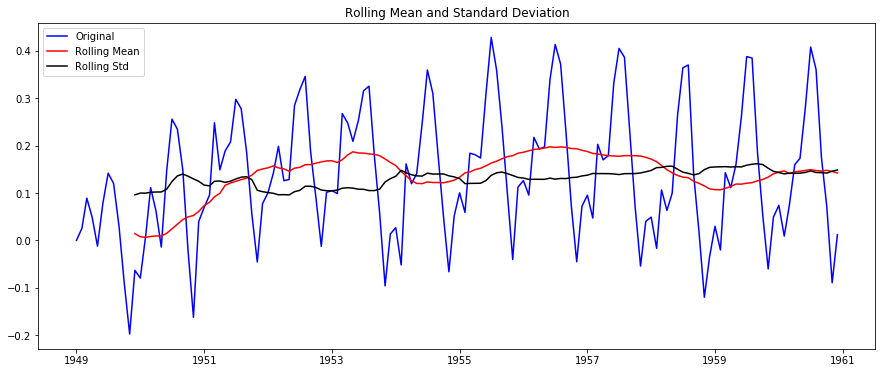

Result of Duckey-Fuller Test
Test Statistic                  -3.601262
p-value                          0.005737
#Lag Used                       13.000000
Number of observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [94]:
ts_log_ewma_diff = ts_log - expweighted_avg
ts_log_moving_avg_diff.head(12)

#Stationarity Check
test_stationarity(ts_log_ewma_diff)

This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as all values from starting are given weights. 

<b> Eliminating Trend and Seasonality </b>

The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

    Differencing – taking the differece with a particular time lag
    Decomposition – modeling both trend and seasonality and removing them from the model.

Differencing

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing can be done in Pandas as:

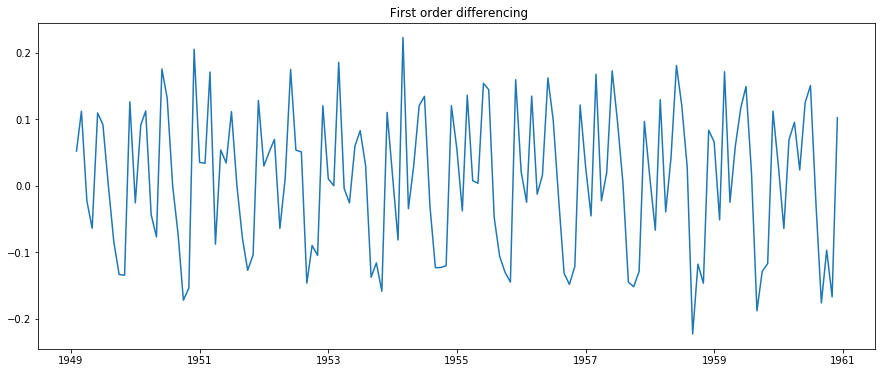

In [98]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

plt.title(' First order differencing')
plt.show(block=False)

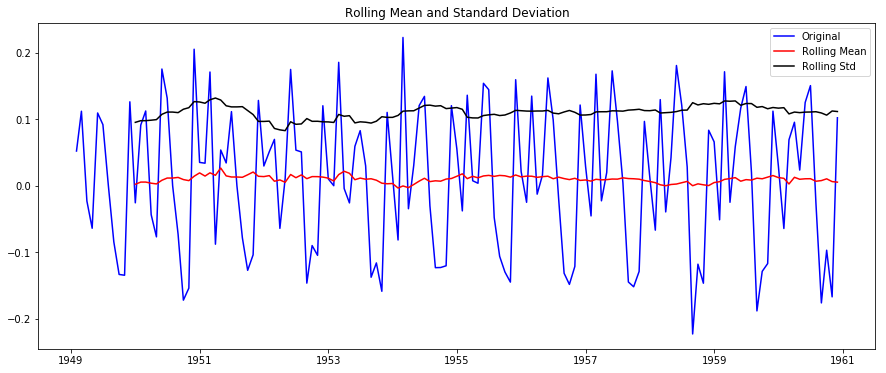

Result of Duckey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lag Used                       14.000000
Number of observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [102]:
#Stationarity Test
test_stationarity(ts_log_diff)

We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. We can also take second or third order differences which might get even better results in certain applications. 

<b> Decomposing </b>

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

In [108]:
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

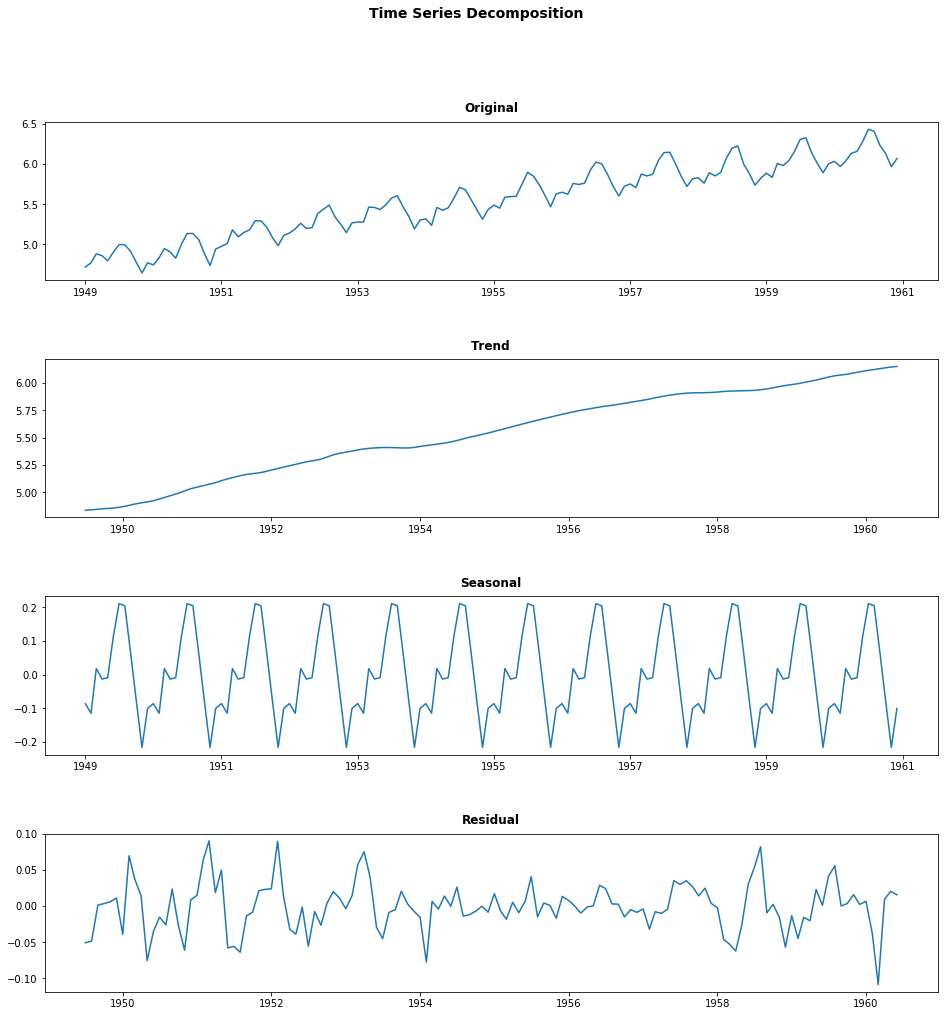

In [139]:
f, axarr = plt.subplots(4, 1)
f.set_size_inches(16, 16)

f.suptitle('Time Series Decomposition', fontsize=14, fontweight='bold')

axarr[0].plot(ts_log, label = 'Original')
axarr[0].set_title("Original",pad=10, fontsize=12, fontweight='bold')

axarr[1].plot(trend, label = 'Trend')
axarr[1].set_title("Trend",pad=10, fontsize=12, fontweight='bold')

axarr[2].plot(seasonal, label = 'Seasonal')
axarr[2].set_title("Seasonal",pad=10, fontsize=12, fontweight='bold')

axarr[3].plot(residual, label = 'Residual')
axarr[3].set_title("Residual",pad=10, fontsize=12, fontweight='bold')

f.subplots_adjust(hspace=0.5)

plt.show()


<b> Stationarity of residuals </b>

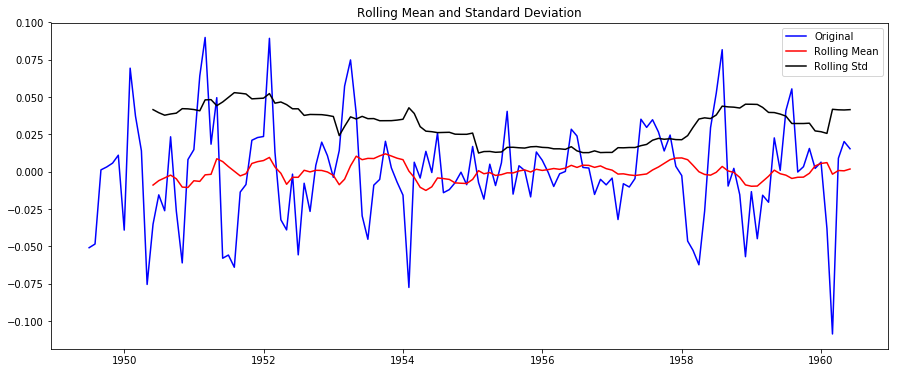

Result of Duckey-Fuller Test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lag Used                      9.000000e+00
Number of observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [143]:
reset_figsize()

ts_log_decompose = residual
test_stationarity(ts_log_decompose)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary. We can try advanced decomposition techniques as well which can generate better results. 

<b> Forecasting a Time Series </b>
    
   Having performed the trend and seasonality estimation techniques, there can be two situations:

    A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
    A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.

ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

- <b> Number of AR (Auto-Regressive) terms (p): </b> AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).


- <b> Number of MA (Moving Average) terms (q): </b> MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.


- <b> Number of Differences (d): </b> These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

- <b> Autocorrelation Function (ACF): </b> It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).


- <b> Partial Autocorrelation Function (PACF): </b> This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

The ACF and PACF plots for the TS after differencing can be plotted as:

In [147]:
lag_acf = acf(ts_log_diff, nlags = 20)
lag_pacf = pacf(ts_log_diff, nlags = 20, method = 'ols')

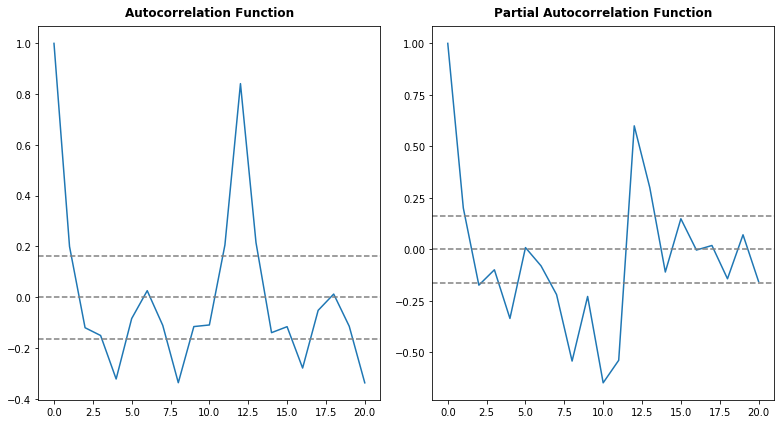

In [168]:
f, axarr = plt.subplots(1, 2)
f.set_size_inches(11, 6)

# f.suptitle('Time Series Decomposition', fontsize=14, fontweight='bold')

#Plot ACF: 
axarr[0].plot(lag_acf)
axarr[0].set_title("Autocorrelation Function",pad=10, fontsize=12, fontweight='bold')

axarr[0].axhline(y=0,linestyle='--',color='gray')
axarr[0].axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
axarr[0].axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')

#Plot PACF:
axarr[1].plot(lag_pacf)
axarr[1].set_title("Partial Autocorrelation Function",pad=10, fontsize=12, fontweight='bold')

axarr[1].axhline(y=0,linestyle='--',color='gray')
axarr[1].axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
axarr[1].axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')

plt.tight_layout()
f.subplots_adjust(hspace=0.9)

plt.show()

The two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

- p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
  
  
  
- q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.


In [256]:
def number_of_AR_MR(ts):
    value= 1.96/np.sqrt(len(ts_log_diff))
    temp = (ts-value)
    minimum = min(i for i in temp if i > 0)
    i, =np.argwhere(temp == minimum)
    # q = round(lag_acf[i][0],2)
    return i[0]+1

In [258]:
p = number_of_AR_MR(lag_pacf)
q = number_of_AR_MR(lag_acf)
d = 1

<b> AR Model </b>

E:\Analytics_Softwares\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
E:\Analytics_Softwares\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
E:\Analytics_Softwares\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


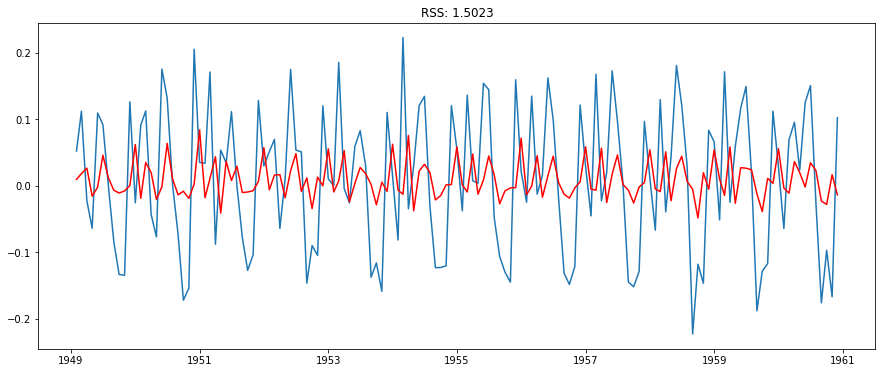

In [272]:
model = ARIMA(ts_log, order = (p, d, 0))
results_AR = model.fit(disp=-1)

reset_figsize()
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_AR.fittedvalues-ts_log_diff)**2))
plt.show()

#### MA Model

E:\Analytics_Softwares\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
E:\Analytics_Softwares\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
E:\Analytics_Softwares\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


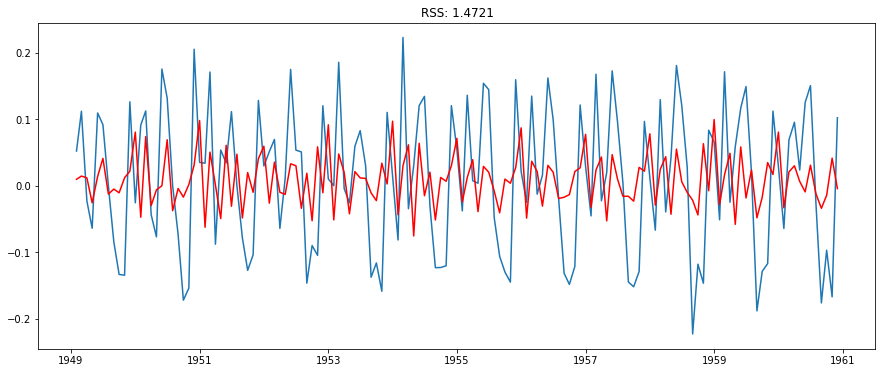

In [274]:
model = ARIMA(ts_log, order = (0, d, q))
results_MA = model.fit(disp=-1)

reset_figsize()
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_MA.fittedvalues-ts_log_diff)**2))

plt.show()

<b> Combined Model </b>

E:\Analytics_Softwares\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
E:\Analytics_Softwares\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
E:\Analytics_Softwares\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


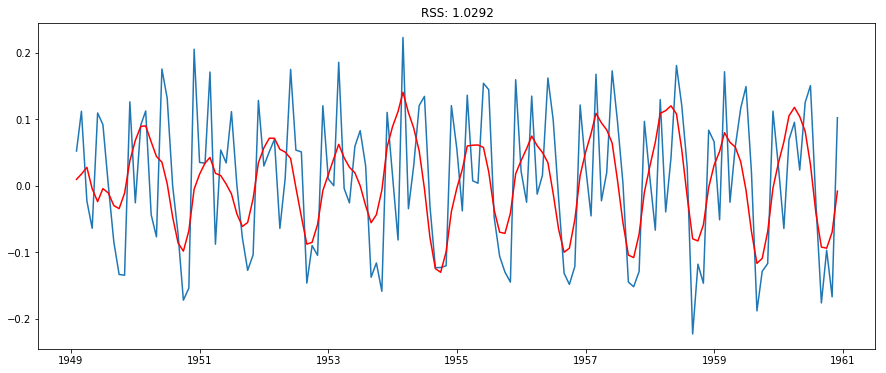

In [276]:
model = ARIMA(ts_log, order = (p, d, q))
results_ARIMA = model.fit(disp=-1)

reset_figsize()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

plt.show()

AR and MA models have almost the same RSS but combined is significantly better. Now, we are left with 1 last step, i.e. taking these values back to the original scale

In [279]:
predictions_ARIMA_diff  = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head(2))

Month
1949-02-01    0.009580
1949-03-01    0.017491
dtype: float64


Notice that these start from ‘1949-02-01’ and not the first month. Why? This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number

In [280]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head(2))

Month
1949-02-01    0.009580
1949-03-01    0.027071
dtype: float64


Next we’ve to add them to base number. For this lets create a series with all values as base number and add the differences to it

In [283]:
predictions_ARIMA_log = pd.Series(ts_log.iloc [0], index = ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head(2)

Month
1949-01-01    4.718499
1949-02-01    4.728079
dtype: float64

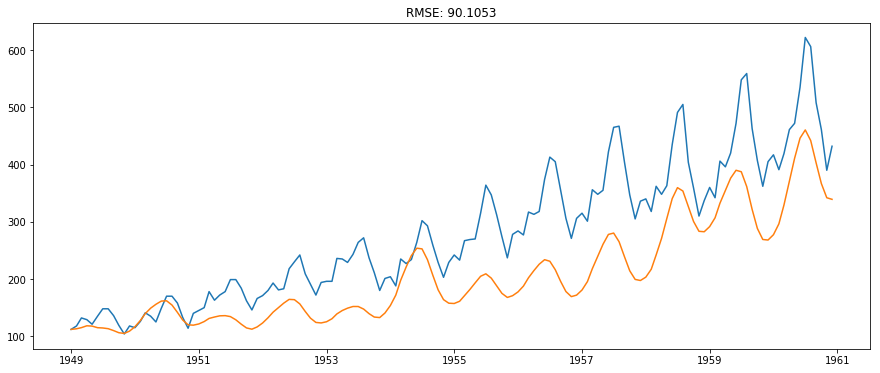

In [286]:
prediction_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(prediction_ARIMA)
plt.title('RMSE: %.4f' %np.sqrt(sum((prediction_ARIMA-ts)**2)/len(ts)))
plt.show()

### Example 2

- https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3 

In [295]:
data = sm.datasets.co2.load_pandas()
co2 = data.data
co2.head(2)

,co2
1958-03-29,316.1
1958-04-05,317.3


In [298]:
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

Weekly data can be tricky to work with, so let's use the monthly averages of our time-series instead. This can be obtained by using the convenient resample function, which allows us to group the time-series into buckets (1 month), apply a function on each group (mean), and combine the result (one row per group).

y = co2['co2'].resample('MS').mean()

Here, the term MS means that we group the data in buckets by months and ensures that we are using the start of each month as the timestamp:

In [297]:
y = co2['co2'].resample('MS').mean()
# df["Magnitude"].resample("2D").apply([np.mean]).plot()
# df["Magnitude"].resample("D").apply([np.mean]).plot()

y.head(2)

1958-03-01    316.1
1958-04-01    317.2
Freq: MS, Name: co2, dtype: float64

In [300]:
y.isnull().sum()
y = y.fillna(y.bfill())

#### Visualizing Time-series Data

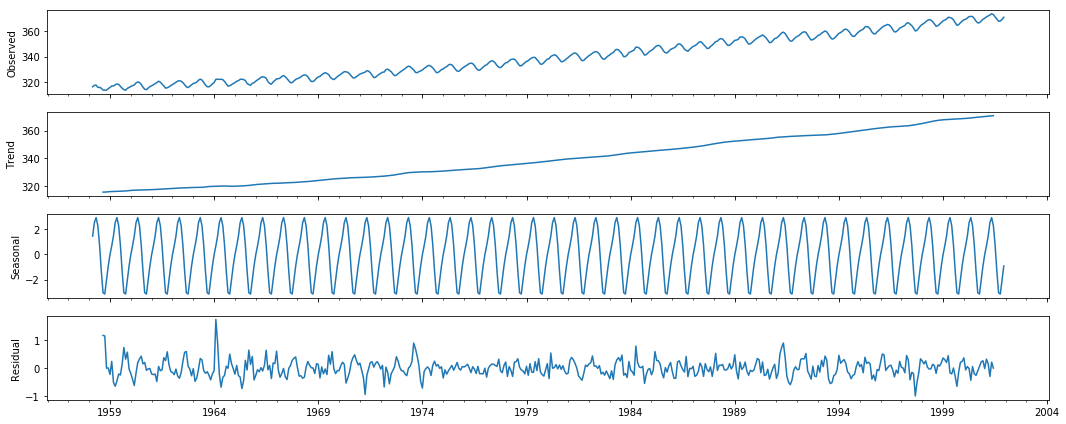

In [303]:
reset_figsize()

decomposition = seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

### Example 3
- https://www.kaggle.com/blackecho/pandas-time-series-analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting

plt.style.use("ggplot")

In [28]:
#Set Fig Size
def reset_figsize():
    plt.rcParams["figure.figsize"] = (15, 6)

In [22]:
# Read the dataset
df = pd.read_csv('../Datasets/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv')

print(df.head(2))

print('\n Data Types')
print(df.info())

                      Time  Latitude  Longitude  Depth/Km  Magnitude
0  2016-08-24 03:36:32.000   42.6983    13.2335       8.1        6.0
1  2016-08-24 03:37:26.580   42.7123    13.2533       9.0        4.5

 Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8086 entries, 0 to 8085
Data columns (total 5 columns):
Time         8086 non-null object
Latitude     8086 non-null float64
Longitude    8086 non-null float64
Depth/Km     8086 non-null float64
Magnitude    8086 non-null float64
dtypes: float64(4), object(1)
memory usage: 315.9+ KB
None


In [23]:
#set Index
df['Time'] = pd.to_datetime(df['Time'])
print(df.head(2))

df.set_index('Time', inplace=True)
print(df.head(2))

#check datatype of index
# df.index

                     Time  Latitude  Longitude  Depth/Km  Magnitude
0 2016-08-24 03:36:32.000   42.6983    13.2335       8.1        6.0
1 2016-08-24 03:37:26.580   42.7123    13.2533       9.0        4.5
                         Latitude  Longitude  Depth/Km  Magnitude
Time                                                             
2016-08-24 03:36:32.000   42.6983    13.2335       8.1        6.0
2016-08-24 03:37:26.580   42.7123    13.2533       9.0        4.5


In [24]:
# Compute summary statistics
df.describe()

,Latitude,Longitude,Depth/Km,Magnitude
count,8086.000000,8086.000000,8086.000000,8086.000000
mean,42.829557,13.161034,9.968328,2.398368
std,0.125927,0.083058,2.194064,0.426381
min,41.581300,12.537700,0.200000,2.000000
25%,42.751350,13.103200,8.900000,2.100000
50%,42.821800,13.160700,9.900000,2.300000
75%,42.911000,13.215650,10.800000,2.600000
max,43.927300,13.852500,47.900000,6.500000


<b> Magnitude </b>

The simplest numeric measure of an earthquake strenght is the magnitude. The magnitude of an earthquake is usually measured by the Richter Scale.

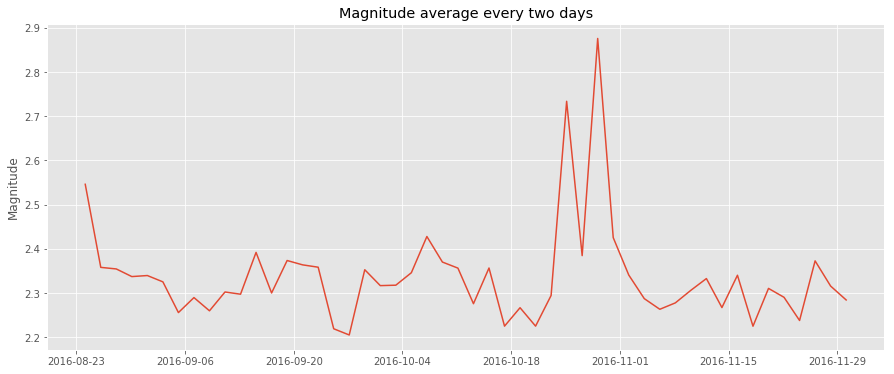

In [31]:
df_magnitude = df['Magnitude'].resample('2D').apply([np.mean])

reset_figsize()
plt.plot(df_magnitude)
plt.title('Magnitude average every two days')
plt.ylabel("Magnitude")
plt.show()

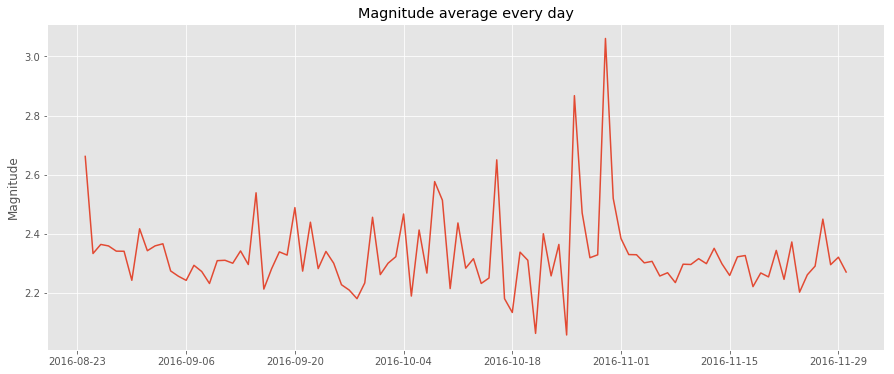

In [33]:
df_magnitude = df['Magnitude'].resample('D').apply([np.mean])

reset_figsize()
plt.plot(df_magnitude)
plt.title('Magnitude average every day')
plt.ylabel("Magnitude")
plt.show()

<b>Magnitude Rolling Mean</b>

Another possible way of visualizing the magnitude is the rolling mean, or moving average. Here, instead of taking the mean of each day, we take the mean of a fixed window of n elements.

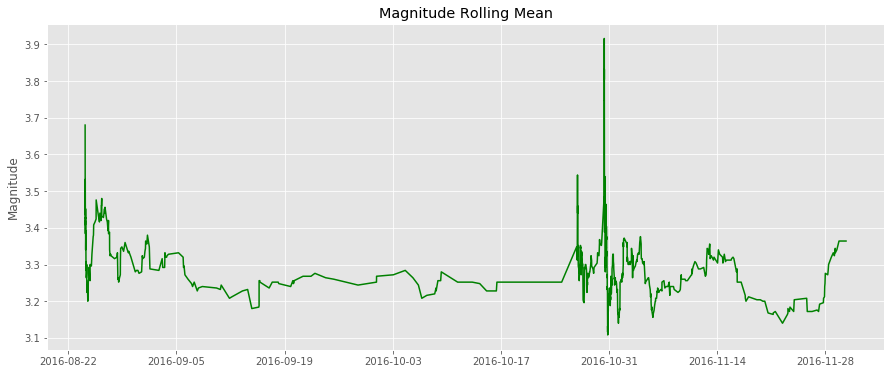

In [40]:
# Pandas series with magnitudes greater than 3.0
magn3 = df.loc[df.Magnitude >= 3.0, "Magnitude"]

df_rolling_mag = pd.Series.rolling(magn3, window=25).mean()
plt.plot(df_rolling_mag, color = 'green')
plt.title("Magnitude Rolling Mean")
plt.ylabel("Magnitude")

plt.show()

<b>Depth</b>

Let's take a look at the depth now. By plotting a histogram of the different values, we can see a nicely shaped bell curve centered at 10km. We can model this with a gaussian distribution of parameters (mu=10, sigma=2.25) and begin to answer some simple questions like: what is the probability of an earthquake having a depth less than 5km? Using this rule, this probability is (approximately) 2.3%. Of course, this value is only related to this event, it is not a fact about earthquakes in general.


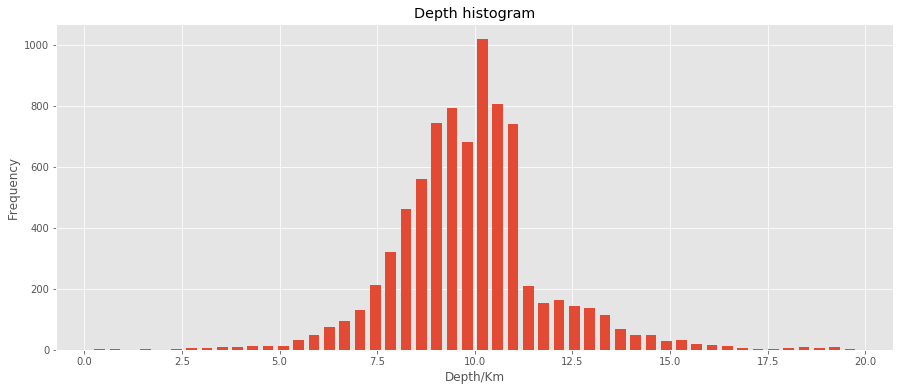

In [51]:
plt.figure()
depth = df[(df["Depth/Km"] < 20) & (df["Depth/Km"] >= 0)]["Depth/Km"]
depth.plot(kind='hist', stacked=True, bins =50,rwidth=0.7)

plt.title("Depth histogram")
plt.xlabel("Depth/Km")
plt.show()

Another interesting question we might try to answer is if earthquakes are more likely to happen at a specific time of day. The 6.0 happened at 3.36am, the 6.5 happened at around 7.50am, so this might be a reasonable thing to search for. Maybe earthquakes are more likely to hit in the morning, or maybe it was just a coincidence

In [58]:
depth_magn = df.where((df.Magnitude >=3.0)).dropna()[["Magnitude", "Depth/Km"]]
depth_magn.head(2)

dm = depth_magn.groupby(depth_magn.index.hour).mean()
dm.head(2)

,Magnitude,Depth/Km
Time,,
0,3.219048,9.071429
1,3.341667,9.720833


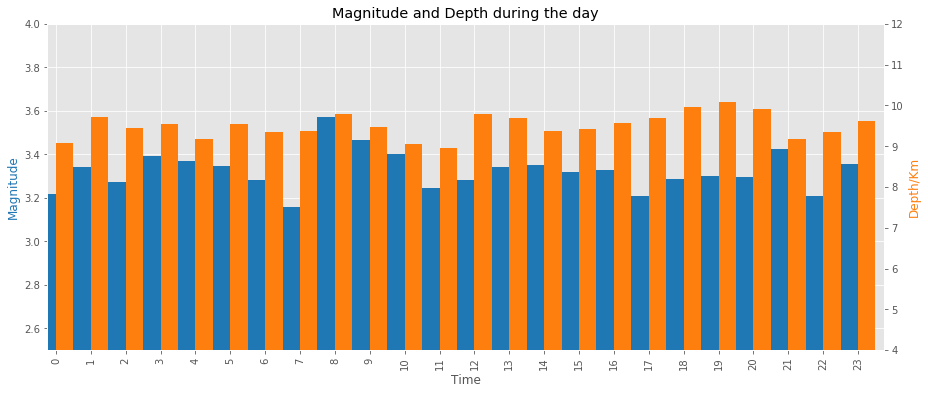

In [75]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_ylim([2.5, 4.0])
ax.set_ylabel("Magnitude")
ax.set_xlabel("Hour of the day")
ax.yaxis.label.set_color("#1f77b4")

ax2 = ax.twinx()
ax2.set_ylim([4.0, 12])
ax2.set_ylabel("Depth/Km")
ax2.set_xlabel("Hour of the day")
ax2.yaxis.label.set_color("#ff7f0e")

width = 0.5

dm["Magnitude"].plot(kind="bar", color='#1f77b4', ax=ax, width=width, position=1)
dm["Depth/Km"].plot(kind="bar", color="#ff7f0e", ax=ax2, width=width, position=0)

plt.grid(False)
plt.title("Magnitude and Depth during the day")

plt.show()

<b> Fourier Extrapolation </b>

In [87]:
# This function is taken from here:
# https://gist.github.com/tartakynov/83f3cd8f44208a1856ce

def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10 # number of harmonics in model
    t= np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x -p[0]*t   #detrended x
    x_freqdom = np.fft.fft(x_notrend)  # detrended x in frequency domain
    f = np.fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
        
    return restored_sig + p[0] * t

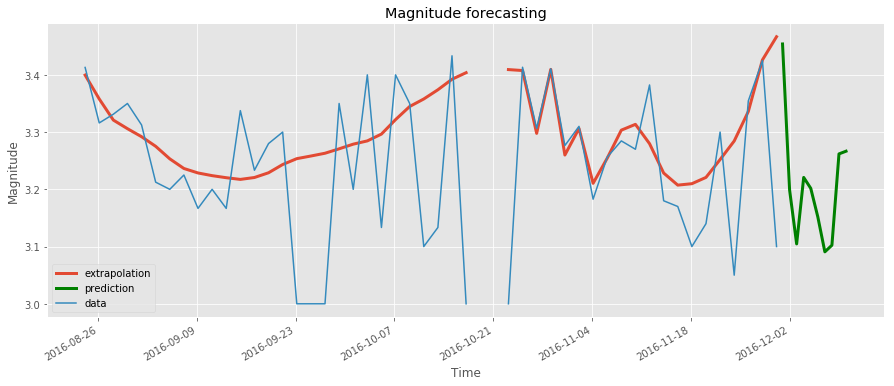

In [86]:
n_predict = 300
resample_period = "2D"
predict_period = "D"

pred = pd.Series(
    fourierExtrapolation(magn3, n_predict),
    index=magn3.index.append(pd.DatetimeIndex(start="2016-12-01", freq="45T", periods=n_predict))
)

fig = plt.figure()

fitted = pred[:-n_predict].resample(resample_period).mean()
predict = pred[-n_predict:].resample(predict_period).mean()

fitted.plot(linewidth=3, label="extrapolation")
predict.plot(linewidth=3, style="-g", label="prediction")
magn3.resample(resample_period).mean().plot(label="data")

plt.title("Magnitude forecasting")
plt.ylabel("Magnitude")
plt.legend(loc="lower left")

### Example 6
- https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

### Example 7
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [16]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('../Datasets/sales-of-shampoo.csv', header=0)

series['Month'] = pd.to_datetime(series['Month'])
print(series.head(2))

# series.set_index('Month', inplace=True)
# print(series.head(2))

#check datatype of index
# X = series.values
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()
# for t in range(len(test)):
#     model = ARIMA(history, order=(5,1,0))
#     model_fit = model.fit(disp=0)
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
    
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.3f' % error)
# # plot
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-01 00:00:00